In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_excel('../data/Urban_Mobility_Patterns_Data.xlsx', sheet_name='Sheet1')
df.head()

,Average_Speed,Waiting_Time,Daily_Commute_Distance,Traffic_Congestion_Score
0,27.490802,5.904533,14.945633,49.967024
1,39.014286,7.101535,13.316484,74.674677
2,34.639879,12.818211,7.046157,56.266678
3,31.973170,5.100066,24.290667,8.330258
4,23.120373,13.044745,19.064966,18.558024


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Average_Speed             4880 non-null   float64
 1   Waiting_Time              5000 non-null   float64
 2   Daily_Commute_Distance    4880 non-null   float64
 3   Traffic_Congestion_Score  5000 non-null   float64
dtypes: float64(4)
memory usage: 156.4 KB


In [5]:
df.isnull().sum()

Average_Speed               120
Waiting_Time                  0
Daily_Commute_Distance      120
Traffic_Congestion_Score      0
dtype: int64

In [6]:
# print rows with missing values
df[df.isnull().any(axis=1)]

,Average_Speed,Waiting_Time,Daily_Commute_Distance,Traffic_Congestion_Score
59,NaN,5.205035,NaN,43.838090
70,NaN,8.292223,NaN,93.309407
111,NaN,12.976066,NaN,74.423526
194,NaN,3.072036,NaN,24.854931
275,NaN,3.412224,NaN,48.600345
...,...,...,...,...
4863,NaN,12.090248,NaN,99.456557
4890,NaN,10.755719,NaN,15.509427
4911,NaN,13.622844,NaN,10.244212
4963,NaN,8.249685,NaN,90.297672


In [7]:
df_clean = df.dropna()
df_only_null = df[~df.index.isin(df_clean.index)]

In [8]:
df_clean.head()

,Average_Speed,Waiting_Time,Daily_Commute_Distance,Traffic_Congestion_Score
0,27.490802,5.904533,14.945633,49.967024
1,39.014286,7.101535,13.316484,74.674677
2,34.639879,12.818211,7.046157,56.266678
3,31.973170,5.100066,24.290667,8.330258
4,23.120373,13.044745,19.064966,18.558024


In [9]:
df_only_null.head()

,Average_Speed,Waiting_Time,Daily_Commute_Distance,Traffic_Congestion_Score
59,NaN,5.205035,NaN,43.838090
70,NaN,8.292223,NaN,93.309407
111,NaN,12.976066,NaN,74.423526
194,NaN,3.072036,NaN,24.854931
275,NaN,3.412224,NaN,48.600345


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train_clean_avgspeed, X_test_clean_avgspeed, y_train_clean_avgspeed, y_test_clean_avgspeed = train_test_split(df_clean[['Waiting_Time', 'Traffic_Congestion_Score']], df_clean[['Average_Speed']], test_size=0.2, random_state=42)

In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def find_best_k(X_train, y_train, X_test, y_test, k_range=(1, 10)):
    error_rate = []
    for i in range(k_range[0], k_range[1]):
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.sqrt(mean_squared_error(y_test, pred_i)))

    plt.figure(figsize=(10, 6))
    plt.plot(range(k_range[0], k_range[1]), error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('RMSE vs. K Value')
    plt.xlabel('K')
    plt.ylabel('RMSE')
    plt.show()

    # print the best k
    best_k = error_rate.index(min(error_rate)) + 1
    print("Minimum RMSE:", min(error_rate), "at K =", best_k)
    
    return best_k


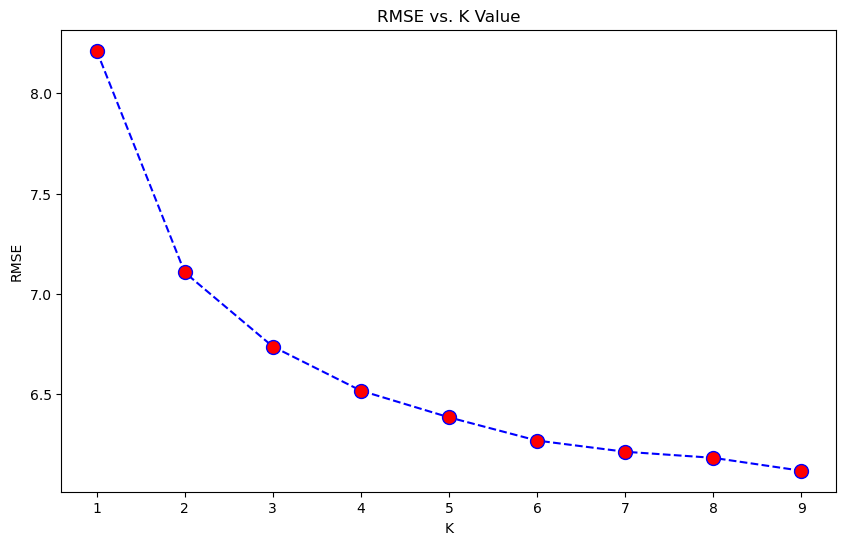

Minimum RMSE: 6.1187991868601035 at K = 9


In [26]:
bestK_clean_avgspeed = find_best_k(X_train_clean_avgspeed, y_train_clean_avgspeed, X_test_clean_avgspeed, y_test_clean_avgspeed)

In [27]:
# train the model with the best k
knn = KNeighborsRegressor(n_neighbors=bestK_clean_avgspeed)
knn.fit(X_train_clean_avgspeed,y_train_clean_avgspeed)
pred = knn.predict(X_test_clean_avgspeed)
print('RMSE:',np.sqrt(mean_squared_error(y_test_clean_avgspeed,pred)))

RMSE: 6.1187991868601035


In [28]:
# predict the missing values and add them to the original dataframe
df_only_null['Average_Speed'] = knn.predict(df_only_null[['Waiting_Time', 'Traffic_Congestion_Score']])
df_only_null.head()

,Average_Speed,Waiting_Time,Daily_Commute_Distance,Traffic_Congestion_Score
59,26.533994,5.205035,24.934953,43.838090
70,32.250248,8.292223,22.224499,93.309407
111,31.243225,12.976066,20.197395,74.423526
194,30.776031,3.072036,17.448805,24.854931
275,31.977573,3.412224,11.781525,48.600345


In [29]:
X_train_clean_comdis, X_test_clean_comdis, y_train_clean_comdis, y_test_clean_comdis = train_test_split(df_clean[['Waiting_Time', 'Traffic_Congestion_Score', 'Average_Speed']], df_clean[['Daily_Commute_Distance']], test_size=0.2, random_state=42)

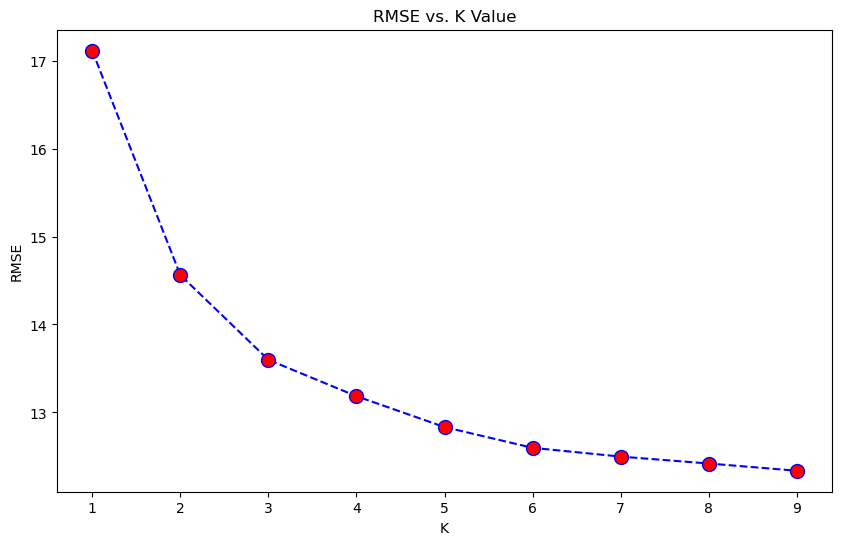

Minimum RMSE: 12.336483567303242 at K = 9


In [30]:
bestK_clean_comdis = find_best_k(X_train_clean_comdis, y_train_clean_comdis, X_test_clean_comdis, y_test_clean_comdis)

In [31]:
# train the model with the best k
knn = KNeighborsRegressor(n_neighbors=bestK_clean_comdis)
knn.fit(X_train_clean_comdis,y_train_clean_comdis)
pred = knn.predict(X_test_clean_comdis)
print('RMSE:',np.sqrt(mean_squared_error(y_test_clean_comdis,pred)))

RMSE: 12.336483567303242


In [32]:
# predict the missing values and add them to the original dataframe
df_only_null['Daily_Commute_Distance'] = knn.predict(df_only_null[['Waiting_Time', 'Traffic_Congestion_Score', 'Average_Speed']])
df_only_null.head()

,Average_Speed,Waiting_Time,Daily_Commute_Distance,Traffic_Congestion_Score
59,26.533994,5.205035,24.934953,43.838090
70,32.250248,8.292223,22.224499,93.309407
111,31.243225,12.976066,20.197395,74.423526
194,30.776031,3.072036,17.448805,24.854931
275,31.977573,3.412224,11.781525,48.600345


In [33]:
# combine the original dataframe with the one containing the predicted values
df = pd.concat([df_clean, df_only_null])
df.head()

,Average_Speed,Waiting_Time,Daily_Commute_Distance,Traffic_Congestion_Score
0,27.490802,5.904533,14.945633,49.967024
1,39.014286,7.101535,13.316484,74.674677
2,34.639879,12.818211,7.046157,56.266678
3,31.973170,5.100066,24.290667,8.330258
4,23.120373,13.044745,19.064966,18.558024


In [34]:
df.isnull().sum()

Average_Speed               0
Waiting_Time                0
Daily_Commute_Distance      0
Traffic_Congestion_Score    0
dtype: int64

In [35]:
df.head()

,Average_Speed,Waiting_Time,Daily_Commute_Distance,Traffic_Congestion_Score
0,27.490802,5.904533,14.945633,49.967024
1,39.014286,7.101535,13.316484,74.674677
2,34.639879,12.818211,7.046157,56.266678
3,31.973170,5.100066,24.290667,8.330258
4,23.120373,13.044745,19.064966,18.558024


In [36]:
df.describe()

,Average_Speed,Waiting_Time,Daily_Commute_Distance,Traffic_Congestion_Score
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,29.927058,7.372307,20.085327,50.768470
std,5.736909,4.284248,11.519759,28.780622
min,20.000233,0.000792,0.006310,0.025245
25%,24.971772,3.707189,10.159475,26.272929
50%,29.988547,7.289574,19.972321,51.244964
75%,34.776182,11.000574,30.287954,75.110557
max,39.994353,14.992578,39.992206,99.992483


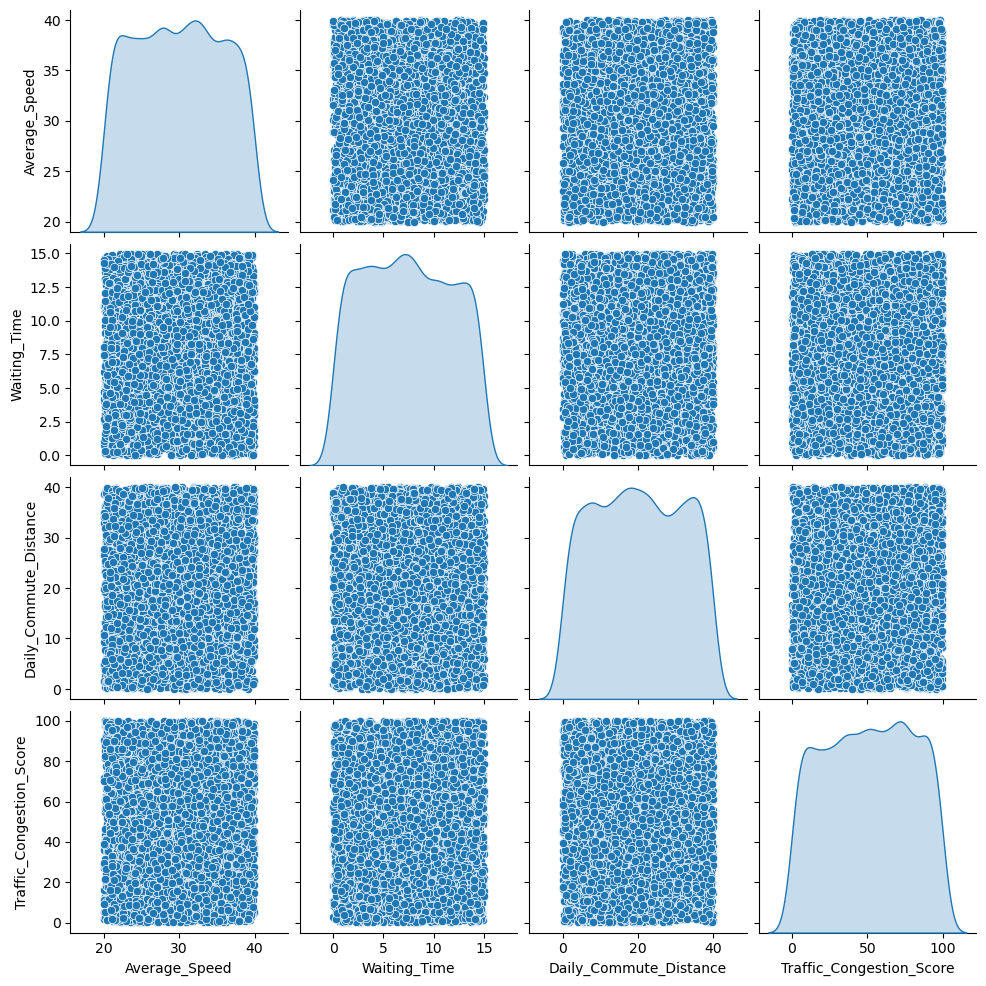

In [38]:
# pairplot
import seaborn as sns
sns.pairplot(df, diag_kind="kde")

In [43]:
# normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df)

In [49]:
from sklearn.cluster import KMeans

Error =[]
for i in range(1, 50):
    kmeans = KMeans(init = "k-means++", n_clusters = i, n_init = 12)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)

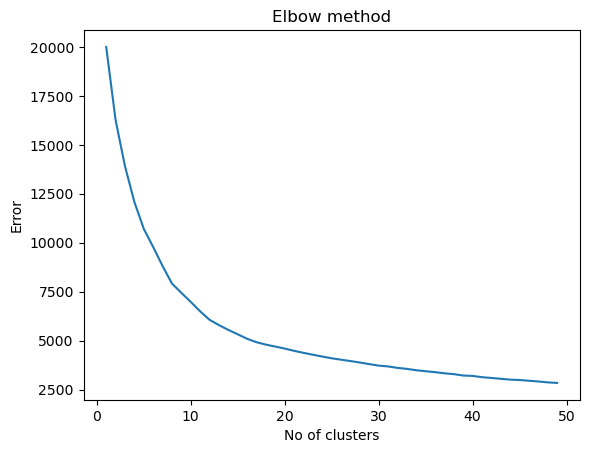

In [50]:
import matplotlib.pyplot as plt
plt.plot(range(1, 50), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [51]:
clusterNum = 12
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[ 1  5 11 ...  4  7  6]


In [52]:
df["Clus_Groups"] = labels
df.head(5)

,Average_Speed,Waiting_Time,Daily_Commute_Distance,Traffic_Congestion_Score,Clus_Groups
0,27.490802,5.904533,14.945633,49.967024,1
1,39.014286,7.101535,13.316484,74.674677,5
2,34.639879,12.818211,7.046157,56.266678,11
3,31.973170,5.100066,24.290667,8.330258,3
4,23.120373,13.044745,19.064966,18.558024,6


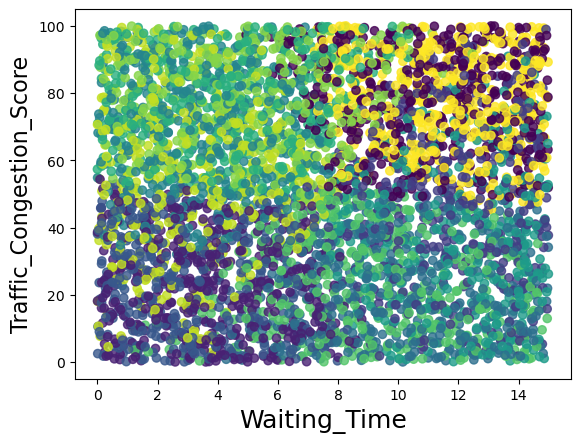

In [58]:
plt.scatter(df['Waiting_Time'], df['Traffic_Congestion_Score'], c=labels.astype(float), alpha=0.8)
plt.xlabel('Waiting_Time', fontsize=18)
plt.ylabel('Traffic_Congestion_Score', fontsize=16)

plt.show()
